# Modelado

In [20]:
# importando las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para dividir los datos
from sklearn.model_selection import train_test_split

# Modelo de regresion 
from sklearn.linear_model import Lasso

# Evaluacion
#from sklearn.metrics import  

In [21]:
# Indicar que la renderizacion de los graficos sea en el notebook
%matplotlib inline

# Establecer eltilo visual de los graficos
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_theme(style='darkgrid')

In [22]:
# Cargar datos
X = pd.read_csv('../data/processed/final_movies_imputados_df.csv')

In [23]:
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,imdb_score
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.00000,4834.0,7.9
1,306000000.0,2.058662e+09,2002.104559,2.126541,108.55095,143.0,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.00000,48350.0,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.00000,11700.0,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.00000,106759.0,8.5


In [24]:
y = X['worldwide_gross']
X.drop('worldwide_gross', axis=1, inplace=True)

## Division de los datos

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Implementacion de un modelo de regresion 
Usare Regresion Lasso

In [26]:
model = Lasso()

In [27]:
model.fit(X_train, y_train)

/Volumes/External/Mac Users/dln/Proyectos/ML_aplicado_recordando/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+18, tolerance: 7.357e+15
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [28]:
predicted = model.predict(X_test)
predicted.shape

(1219,)

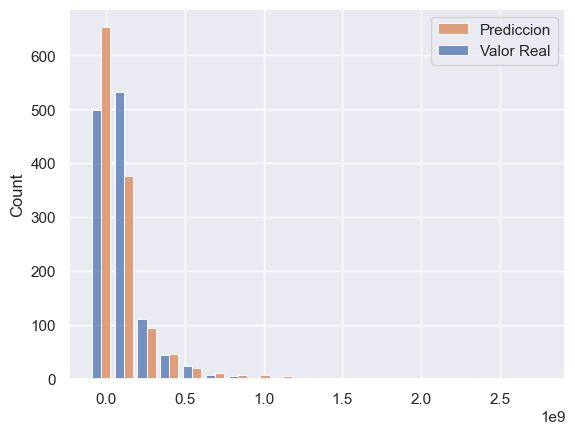

In [70]:
sns.histplot([predicted, y_test], bins=20, multiple='dodge', shrink=.8,)
plt.legend(labels=['Prediccion', 'Valor Real'], frameon=True);
#plt.ylim(0, 200)


In [ ]:
sns.histplot([predicted, y_test], bins=20, multiple='dodge', shrink=.8,)
plt.legend(labels=['Prediccion', 'Valor Real'], frameon=True)

## Evaluando el modelo

In [72]:
# Esto nos retorna el R2 Score
model.score(X_test, y_test)

0.550870542889565

In [74]:
residuales = y_test - predicted

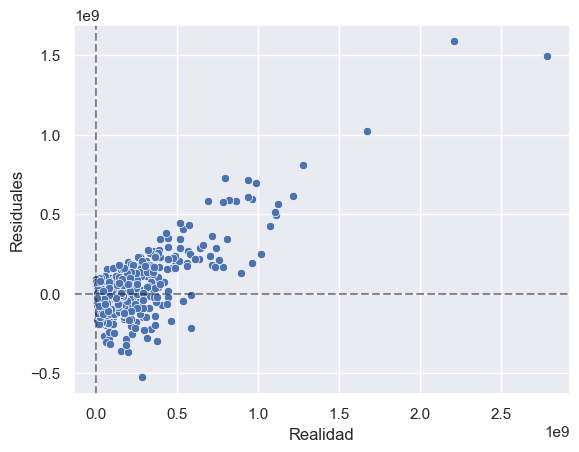

In [80]:
sns.scatterplot(x=y_test, y=residuales)
plt.axhline(y=0, c='k', ls='--', alpha=0.5)
plt.axvline(x=0, c='k', ls='--', alpha=0.5)
plt.xlabel('Realidad')
plt.ylabel('Residuales');

In [91]:
### Ahora fijemosnos no en la cantidad, sino en el porcentaje de error 
# Volores Absolutos (positivos)
ap_residuales = np.abs(residuales) / y_test

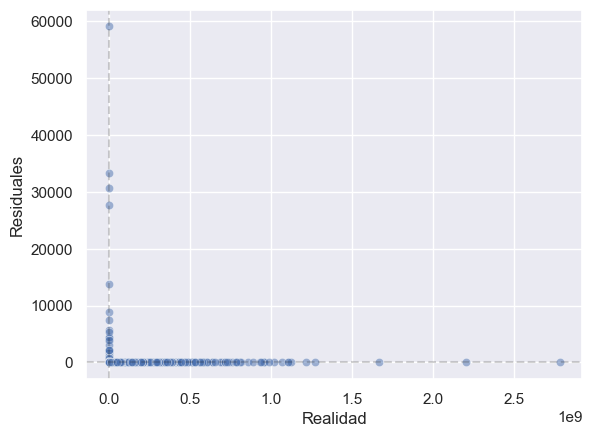

In [96]:
# Graficamos los residuales porcentuales
sns.scatterplot(x=y_test, y=ap_residuales, alpha=0.5)
plt.axhline(y=0, c='k', ls='--', alpha=0.2)
plt.axvline(x=0, c='k', ls='--', alpha=0.2)
plt.xlabel('Realidad')
plt.ylabel('Residuales');

In [97]:
## Reducir la escala para apreciar mejor los datos lejanos
# Pasandolo a escala logaritmica
lap_residuales = np.log(ap_residuales)

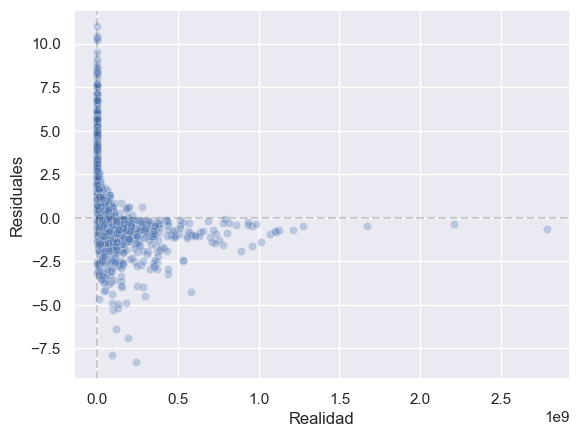

In [98]:
sns.scatterplot(x=y_test, y=lap_residuales, alpha=0.3)
plt.axhline(y=0, c='k', ls='--', alpha=0.2)
plt.axvline(x=0, c='k', ls='--', alpha=0.2)
plt.xlabel('Realidad')
plt.ylabel('Residuales');

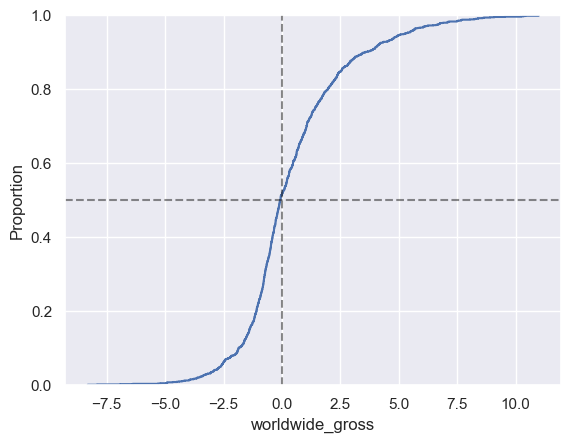

In [113]:
# Funbcion Cumulativa de la distribucion de los errores
# sns.histplot(lap_residuales, bins=100, cumulative=True, element='step', stat='density', fill=False)
sns.ecdfplot(lap_residuales)
plt.axvline(x=0, c='k', ls='--', alpha=0.5)
plt.axhline(y=0.5, c='k', ls='--', alpha=0.5)

No esta mal para un primer acercamiento.
Tenemos a poco mas de la mitad de los datos haciendo buenas predicciones.

Ahora la tarea es mejorar esa presicion.